In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tnrange,tqdm_notebook
import seaborn as sns
import matplotlib.pyplot as plt
os.chdir("C:\\workspace\\DACON3\\Auction_master_test")
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: 'C:\\workspace\\DACON3\\Auction_master_test'

In [2]:
AM_train = pd.read_csv("Auction_master_train.csv")
AM_test = pd.read_csv("Auction_master_test.csv")
AM_test.drop(index=[397], axis = 0, inplace=True)
#AM_train = pd.concat([AM_train, AM_test], axis = 0)
AM_train.shape

del AM_train["point.x"]
del AM_train["point.y"]
del AM_train['Appraisal_company']
del AM_train["Final_result"]
del AM_train["addr_si"]
del AM_train["addr_dong"]
del AM_train["addr_li"]
del AM_train["addr_san"]
del AM_train["addr_bunji1"]
del AM_train["addr_bunji2"]
del AM_train["addr_etc"]
del AM_train["Specific"]
del AM_train["road_name"]
del AM_train["road_bunji1"]
del AM_train["road_bunji2"]
del AM_train["Close_result"]
del AM_train["Creditor"]
###############################################################################

#del AM_train['Total_land_gross_area']






import datetime

def change_datetime(x):
    today = datetime.date.today()
    someday = datetime.date(int(x[:4]), int(x[5:7]), int(x[8:10]))
    diff = today - someday
    return diff.days

# del AM_train["Appraisal_date"]
# del AM_train["First_auction_date"]
# del AM_train["Preserve_regist_date"]
# del AM_train["Final_auction_date"]
# del AM_train["Close_date"]
AM_train["Appraisal_date"] = AM_train["Appraisal_date"].apply(lambda x : x[:10])
AM_train["First_auction_date"] = AM_train["First_auction_date"].apply(lambda x : x[:10])
AM_train["Final_auction_date"] = AM_train["Final_auction_date"].apply(lambda x : x[:10])
AM_train["Preserve_regist_date"] = AM_train["Preserve_regist_date"].apply(lambda x : x[:10])
AM_train["Close_date"] = AM_train["Close_date"].apply(lambda x : x[:10])
AM_train["Appraisal_date"] = AM_train["Appraisal_date"].apply(change_datetime)
AM_train["First_auction_date"] = AM_train["First_auction_date"].apply(change_datetime)
AM_train["Final_auction_date"] = AM_train["Final_auction_date"].apply(change_datetime)
AM_train["Preserve_regist_date"] = AM_train["Preserve_regist_date"].apply(change_datetime)
AM_train["Close_date"] = AM_train["Close_date"].apply(change_datetime)

AM_train["Diff_price"] = AM_train['Total_appraisal_price'] - AM_train['Minimum_sales_price']
AM_train["Diff_date"] = AM_train['First_auction_date'] - AM_train['Final_auction_date']

print(AM_train.Auction_class.unique())
AM_train.Auction_class.replace({'임의':0, '강제':1},inplace=True)
print(AM_train.Auction_class.unique())
print("-"*50)
print(AM_train.addr_do.unique())
AM_train.addr_do.replace({'부산':0, '서울':1},inplace=True)
print(AM_train.addr_do.unique())
print("-"*50)
print(AM_train.Apartment_usage.unique())
AM_train.Apartment_usage.replace({'주상복합':0, '아파트':1},inplace=True)
print(AM_train.Apartment_usage.unique())
print("-"*50)
print(AM_train.Share_auction_YorN.unique())
AM_train.Share_auction_YorN.replace({'N':0, 'Y':1},inplace=True)
print(AM_train.Share_auction_YorN.unique())
print("-"*50)
def change_spec(x):
    if isinstance(x, str):
        return int(1)
    else:
        return int(0)
# AM_train.Creditor = AM_train.Creditor.apply(lambda x : x if x == 'Private' else 'Company')
# print(AM_train.Creditor.unique())
# AM_train.Creditor.replace({'Private':0, 'Company':1},inplace=True)
# print(AM_train.Creditor.unique())
#AM_train["Specific"] = AM_train.Specific.apply(change_spec)
#print(AM_train.Specific.unique())

del AM_train["Preserve_regist_date"]
#del AM_train["Final_auction_date"]
del AM_train["First_auction_date"]
del AM_train["Close_date"]
#del AM_train["Appraisal_date"]

['임의' '강제']
[0 1]
--------------------------------------------------
['부산' '서울']
[0 1]
--------------------------------------------------
['주상복합' '아파트']
[0 1]
--------------------------------------------------
['N' 'Y']
[0 1]
--------------------------------------------------


In [30]:
AM_train1 = AM_train.loc[AM_train.Total_appraisal_price == AM_train.Minimum_sales_price]
AM_train2 = AM_train.loc[AM_train.Total_appraisal_price != AM_train.Minimum_sales_price]
#del AM_train1['addr_do']
#del AM_train2['addr_do']

In [31]:
# AM_train2.drop(index=[1521], axis = 0, inplace=True) #제일 심한 이상치
# AM_train2.drop(index=[1515], axis = 0, inplace=True) #2번 째 심한 이상치

In [32]:
cate_features = AM_train.dtypes[AM_train.dtypes == "object"].index.format()
conti_featrues = AM_train.dtypes[AM_train.dtypes != "object"].index.format()
conti_featrues, cate_features

(['Auction_key',
  'Auction_class',
  'Claim_price',
  'Appraisal_date',
  'Auction_count',
  'Auction_miscarriage_count',
  'Total_land_gross_area',
  'Total_land_real_area',
  'Total_land_auction_area',
  'Total_building_area',
  'Total_building_auction_area',
  'Total_appraisal_price',
  'Minimum_sales_price',
  'Final_auction_date',
  'addr_do',
  'Apartment_usage',
  'Total_floor',
  'Current_floor',
  'Share_auction_YorN',
  'Hammer_price',
  'Diff_price',
  'Diff_date'],
 ['Bid_class'])

In [33]:
conti_featrues.remove("Hammer_price")
conti_featrues.remove("Auction_key")
#conti_featrues.remove("addr_do")

In [34]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
AM_train1[conti_featrues] = scale.fit_transform(AM_train1[conti_featrues])
AM_train2[conti_featrues] = scale.fit_transform(AM_train2[conti_featrues])

In [35]:
print(AM_train1[conti_featrues].shape, pd.get_dummies(AM_train1[cate_features]).shape)
print(AM_train2[conti_featrues].shape, pd.get_dummies(AM_train2[cate_features]).shape)

(685, 20) (685, 3)
(1248, 20) (1248, 3)


In [36]:
X = pd.concat([AM_train1[conti_featrues], pd.get_dummies(AM_train1[cate_features])], axis= 1)
y = AM_train1.Hammer_price.values
print(X.shape, y.shape)

X1 = pd.concat([AM_train2[conti_featrues], pd.get_dummies(AM_train2[cate_features])], axis= 1)
y1 = AM_train2.Hammer_price.values
print(X1.shape, y1.shape)

(685, 23) (685,)
(1248, 23) (1248,)


In [37]:
X1 = pd.concat([AM_train2[conti_featrues], pd.get_dummies(AM_train2[cate_features])], axis= 1)
y1 = AM_train2.Hammer_price.values
X1.shape, y1.shape

((1248, 23), (1248,))

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((616, 23), (616,), (69, 23), (69,))

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut

In [46]:
RF_rg = KNeighborsRegressor(n_neighbors=1)
RF_rg.fit(X_train, y_train)

pred1 = RF_rg.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred1)))

287186500.5831575


In [15]:
lasso_regressor = Ridge(alpha = 0.48)
ridge_regressor = Ridge(alpha = 0.00)
lasso_scores = cross_val_score(lasso_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(ridge_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
print("MSE of Lasso is ", np.array(np.sqrt(np.abs(lasso_scores)).mean()))
print("MSE of Lasso is ", np.array(np.sqrt(np.abs(ridge_scores)).mean()))

MSE of Lasso is  46561099.076571964
MSE of Lasso is  44483341.592276834


In [16]:
# X2['Hammer_price'] = y2
# X2.to_csv("C:\\Users\\korea\\Desktop\\SEOUL.csv", encoding='utf-8', index= False)

<function matplotlib.pyplot.show(*args, **kw)>

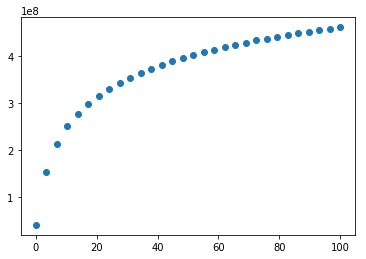

In [17]:
val_rmse_list = [[], []]
for i in tqdm_notebook(np.linspace(0.01, 100, 30)):
    RF_rg = Ridge(alpha=i)
    RF_rg.fit(X_train, y_train)

    pred1 = RF_rg.predict(X_test)
    val_rmse_list[0].append(i)
    val_rmse_list[1].append(np.sqrt(mean_squared_error(y_test, pred1)))
val_rmse_list = np.array(val_rmse_list)
plt.scatter(val_rmse_list[0], val_rmse_list[1])
plt.show

In [18]:
val_rmse_list[0][np.where(val_rmse_list[1] == val_rmse_list[1].min())]

array([0.01])

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.1, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1123, 23), (1123,), (125, 23), (125,))

In [20]:
RF_rg = LinearRegression()
RF_rg.fit(X_train, y_train)

pred1 = RF_rg.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred1)))

60809514.76481833


In [21]:
RF_rg = Ridge(alpha=0.48584858)
RF_rg.fit(X_train, y_train)

pred1 = RF_rg.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred1)))

157440408.64226338


In [22]:
lasso_regressor = Ridge(alpha = 0.48)
ridge_regressor = Ridge(alpha = 0.01)
lasso_scores = cross_val_score(lasso_regressor, X1, y1, cv=10, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(ridge_regressor, X1, y1, cv=10, scoring='neg_mean_squared_error')
print("MSE of Lasso is ", np.array(np.sqrt(np.abs(lasso_scores)).mean()))
print("MSE of Lasso is ", np.array(np.sqrt(np.abs(ridge_scores)).mean()))

MSE of Lasso is  139645940.3103538
MSE of Lasso is  74417701.1667131


<function matplotlib.pyplot.show(*args, **kw)>

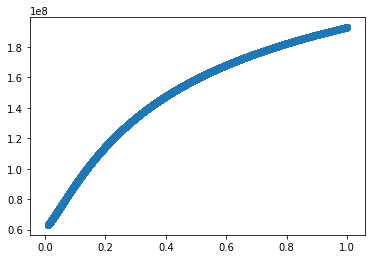

In [23]:
val_rmse_list = [[], []]
for i in tqdm_notebook(np.linspace(0.01, 1, 10000)):
    RF_rg = Ridge(alpha=i)
    RF_rg.fit(X_train, y_train)

    pred1 = RF_rg.predict(X_test)
    val_rmse_list[0].append(i)
    val_rmse_list[1].append(np.sqrt(mean_squared_error(y_test, pred1)))
val_rmse_list = np.array(val_rmse_list)
plt.scatter(val_rmse_list[0], val_rmse_list[1])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

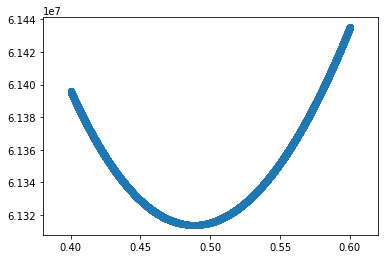

In [466]:
val_rmse_list = [[], []]
for i in tqdm_notebook(np.linspace(0.4, 0.6, 10000)):
    RF_rg = Ridge(alpha=i)
    RF_rg.fit(X_train, y_train)

    pred1 = RF_rg.predict(X_test)
    val_rmse_list[0].append(i)
    val_rmse_list[1].append(np.sqrt(mean_squared_error(y_test, pred1)))
val_rmse_list = np.array(val_rmse_list)
plt.scatter(val_rmse_list[0], val_rmse_list[1])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

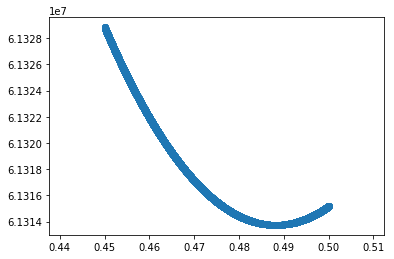

In [467]:
val_rmse_list = [[], []]
for i in tqdm_notebook(np.linspace(0.45, 0.5, 10000)):
    RF_rg = Ridge(alpha=i)
    RF_rg.fit(X_train, y_train)

    pred1 = RF_rg.predict(X_test)
    val_rmse_list[0].append(i)
    val_rmse_list[1].append(np.sqrt(mean_squared_error(y_test, pred1)))
val_rmse_list = np.array(val_rmse_list)
plt.scatter(val_rmse_list[0], val_rmse_list[1])
plt.show

In [468]:
val_rmse_list[0][np.where(val_rmse_list[1] == val_rmse_list[1].min())]

array([0.48815882])

In [176]:
RF_rg = Ridge(alpha=0.01)
RF_rg.fit(X_train, y_train)

pred1 = RF_rg.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred1)))

C:\Users\korea\Anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


66047530.57731842


In [ ]:
name = np.array(pd.concat([AM_train1[conti_featrues], pd.get_dummies(AM_train1[cate_features])], axis= 1).columns.tolist())
values = np.abs(np.array(RF_rg.coef_.tolist()))

for i,j in zip(values[np.argsort(values)], name[np.argsort(values)]):
    print(j, " = ", i)

In [211]:
cross_valid_rmse = [[], [], []]
for i in tqdm_notebook(np.linspace(0., 20, 1000)):
    lasso_regressor = Lasso(alpha = i, warm_start=False)
    ridge_regressor = Ridge(alpha = i)
    lasso_scores = cross_val_score(lasso_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
    ridge_scores= cross_val_score(ridge_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
    cross_valid_rmse[0].append(i)
    cross_valid_rmse[1].append(np.sqrt(np.abs(lasso_scores)).mean())
    cross_valid_rmse[2].append(np.sqrt(np.abs(ridge_scores)).mean())

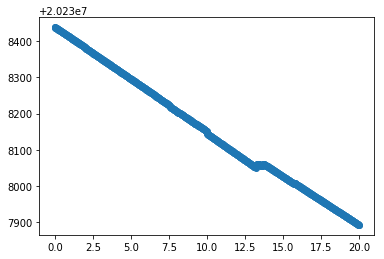

In [216]:
#plt.scatter(cross_valid_rmse[0], cross_valid_rmse[1])
plt.scatter(cross_valid_rmse[0], cross_valid_rmse[1])
plt.show()

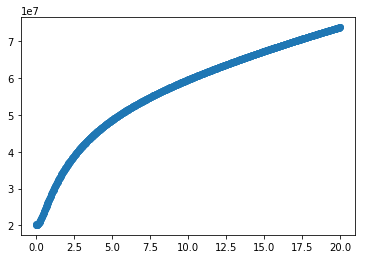

In [213]:
#plt.scatter(cross_valid_rmse[0], cross_valid_rmse[1])
plt.scatter(cross_valid_rmse[0], cross_valid_rmse[2])
plt.show()

In [225]:
print("Min MSE of Lasso is ", np.array(cross_valid_rmse[1]).min())
print("Min MSE of Ridge is ", np.array(cross_valid_rmse[2]).min())

Min MSE of Lasso is  20237893.061924644
Min MSE of Ridge is  20134871.261138983


In [226]:
cross_valid_rmse = [[], [], []]
for i in tqdm_notebook(np.linspace(0., 20, 1000)):
    lasso_regressor = Lasso(alpha = i, warm_start=False)
    ridge_regressor = Ridge(alpha = i)
    lasso_scores = cross_val_score(lasso_regressor, X1, y1, cv=10, scoring='neg_mean_squared_error')
    ridge_scores= cross_val_score(ridge_regressor, X1, y1, cv=10, scoring='neg_mean_squared_error')
    cross_valid_rmse[0].append(i)
    cross_valid_rmse[1].append(np.sqrt(np.abs(lasso_scores)).mean())
    cross_valid_rmse[2].append(np.sqrt(np.abs(ridge_scores)).mean())

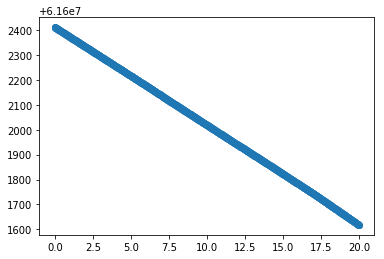

In [227]:
#plt.scatter(cross_valid_rmse[0], cross_valid_rmse[1])
plt.scatter(cross_valid_rmse[0], cross_valid_rmse[1])
plt.show()

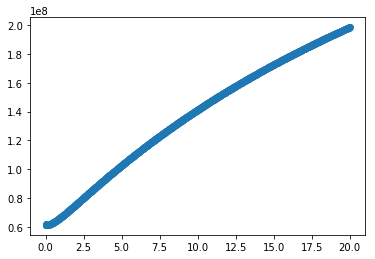

In [228]:
#plt.scatter(cross_valid_rmse[0], cross_valid_rmse[1])
plt.scatter(cross_valid_rmse[0], cross_valid_rmse[2])
plt.show()

In [229]:
print("Min MSE of Lasso is ", np.array(cross_valid_rmse[1]).min())
print("Min MSE of Ridge is ", np.array(cross_valid_rmse[2]).min())

Min MSE of Lasso is  61601618.01628931
Min MSE of Ridge is  61335786.96663551


In [230]:
# loo = LeaveOneOut()
  
# lasso_regressor = Lasso(alpha = 0.01, warm_start=False)
# ridge_regressor = Ridge(alpha = 0.01)
# lasso_scores = cross_val_score(lasso_regressor, X1, y1, cv=loo, scoring='neg_mean_squared_error')
# ridge_scores= cross_val_score(ridge_regressor, X1, y1, cv=loo, scoring='neg_mean_squared_error')

# np.mean(np.sqrt(abs(lasso_scores))),np.mean(np.sqrt(abs(ridge_scores)))

In [ ]:
# nac = AM_train.groupby('addr_si')['Hammer_price', 'Claim_price'].median()

# nac['per'] = nac.Claim_price / nac.Hammer_price
# nac

# 271953000*0.551934

# part = AM_train[AM_train['addr_si'] == '중구'][['Claim_price','Total_building_auction_area','Total_appraisal_price', 'Hammer_price']]
# part['per'] = part.Hammer_price / part.Claim_price
# part['Diff'] = part.Total_appraisal_price - part.Claim_price
# 101858574
# 22100000

# part = AM_test[AM_test['addr_si'] == '중구'][['Claim_price','Total_building_auction_area','Total_appraisal_price', 'Hammer_price']]
# part['Diff'] = part.Total_appraisal_price - part.Claim_price
# part

# PCA REGRESSION

In [815]:
AM_train = pd.read_csv("Auction_master_train.csv")
AM_test = pd.read_csv("Auction_master_test.csv")
AM_test.drop(index=[397], axis = 0, inplace=True)
AM_train = pd.concat([AM_train, AM_test], axis = 0)
AM_train.shape

#del AM_train["point.x"]
#del AM_train["point.y"]
del AM_train['Appraisal_company']
del AM_train["Final_result"]

del AM_train["addr_si"]
del AM_train["addr_dong"]
del AM_train["addr_li"]
del AM_train["addr_san"]
del AM_train["addr_bunji1"]
del AM_train["addr_bunji2"]
del AM_train["addr_etc"]
del AM_train["Specific"]
del AM_train["road_name"]
del AM_train["road_bunji1"]
del AM_train["road_bunji2"]
del AM_train["Close_result"]
del AM_train["Creditor"]
###############################################################################

#del AM_train['Total_land_gross_area']






import datetime

def change_datetime(x):
    today = datetime.date.today()
    someday = datetime.date(int(x[:4]), int(x[5:7]), int(x[8:10]))
    diff = today - someday
    return diff.days

# del AM_train["Appraisal_date"]
# del AM_train["First_auction_date"]
# del AM_train["Preserve_regist_date"]
# del AM_train["Final_auction_date"]
# del AM_train["Close_date"]
AM_train["Appraisal_date"] = AM_train["Appraisal_date"].apply(lambda x : x[:10])
AM_train["First_auction_date"] = AM_train["First_auction_date"].apply(lambda x : x[:10])
AM_train["Final_auction_date"] = AM_train["Final_auction_date"].apply(lambda x : x[:10])
AM_train["Preserve_regist_date"] = AM_train["Preserve_regist_date"].apply(lambda x : x[:10])
AM_train["Close_date"] = AM_train["Close_date"].apply(lambda x : x[:10])
AM_train["Appraisal_date"] = AM_train["Appraisal_date"].apply(change_datetime)
AM_train["First_auction_date"] = AM_train["First_auction_date"].apply(change_datetime)
AM_train["Final_auction_date"] = AM_train["Final_auction_date"].apply(change_datetime)
AM_train["Preserve_regist_date"] = AM_train["Preserve_regist_date"].apply(change_datetime)
AM_train["Close_date"] = AM_train["Close_date"].apply(change_datetime)

AM_train["Diff_price"] = AM_train['Total_appraisal_price'] - AM_train['Minimum_sales_price']
AM_train["Diff_date"] = AM_train['First_auction_date'] - AM_train['Final_auction_date']

print(AM_train.Auction_class.unique())
AM_train.Auction_class.replace({'임의':0, '강제':1},inplace=True)
print(AM_train.Auction_class.unique())
print("-"*50)
print(AM_train.addr_do.unique())
AM_train.addr_do.replace({'부산':0, '서울':1},inplace=True)
print(AM_train.addr_do.unique())
print("-"*50)
print(AM_train.Apartment_usage.unique())
AM_train.Apartment_usage.replace({'주상복합':0, '아파트':1},inplace=True)
print(AM_train.Apartment_usage.unique())
print("-"*50)
print(AM_train.Share_auction_YorN.unique())
AM_train.Share_auction_YorN.replace({'N':0, 'Y':1},inplace=True)
print(AM_train.Share_auction_YorN.unique())
print("-"*50)
def change_spec(x):
    if isinstance(x, str):
        return int(1)
    else:
        return int(0)
# AM_train.Creditor = AM_train.Creditor.apply(lambda x : x if x == 'Private' else 'Company')
# print(AM_train.Creditor.unique())
# AM_train.Creditor.replace({'Private':0, 'Company':1},inplace=True)
# print(AM_train.Creditor.unique())
#AM_train["Specific"] = AM_train.Specific.apply(change_spec)
#print(AM_train.Specific.unique())

del AM_train["Preserve_regist_date"]
#del AM_train["Final_auction_date"]
del AM_train["First_auction_date"]
del AM_train["Close_date"]
#del AM_train["Appraisal_date"]

from sklearn.cluster import KMeans
point = AM_train[["point.x", "point.y"]]
X = point.values
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
kmeans.labels_
AM_train['4class'] = kmeans.labels_
del AM_train["point.x"]
del AM_train["point.y"]

AM_train1 = AM_train[AM_train.addr_do == 0]
AM_train2 = AM_train[AM_train.addr_do == 1]
#del AM_train1['addr_do']
#del AM_train2['addr_do']
AM_train2.drop(index=[1521], axis = 0, inplace=True) #제일 심한 이상치
AM_train2.drop(index=[1515], axis = 0, inplace=True) #2번 째 심한 이상치

print(AM_train1['4class'].unique())
AM_train1.replace({1 : 0, 3 :1}, inplace=True)
print(AM_train1['4class'].unique())

print(AM_train2['4class'].unique())
AM_train2.replace({0 : 0, 2 :1}, inplace=True)
print(AM_train2['4class'].unique())

AM_train1 = AM_train[AM_train.addr_do == 0]
AM_train2 = AM_train[AM_train.addr_do == 1]
#del AM_train1['addr_do']
#del AM_train2['addr_do']
AM_train2.drop(index=[1521], axis = 0, inplace=True) #제일 심한 이상치
AM_train2.drop(index=[1515], axis = 0, inplace=True) #2번 째 심한 이상치

cate_features = AM_train.dtypes[AM_train.dtypes == "object"].index.format()
conti_featrues = AM_train.dtypes[AM_train.dtypes != "object"].index.format()
conti_featrues, cate_features

conti_featrues.remove("Hammer_price")
conti_featrues.remove("Auction_key")
conti_featrues.remove("addr_do")

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
AM_train1[conti_featrues] = scale.fit_transform(AM_train1[conti_featrues])
AM_train2[conti_featrues] = scale.fit_transform(AM_train2[conti_featrues])

['임의' '강제']
[0 1]
--------------------------------------------------
['부산' '서울']
[0 1]
--------------------------------------------------
['주상복합' '아파트']
[0 1]
--------------------------------------------------
['N' 'Y']
[0 1]
--------------------------------------------------
[3 1]
[1 0]
[2 0]
[1 0]


In [44]:
AM_train.columns

Index(['Auction_key', 'Auction_class', 'Bid_class', 'Claim_price',
       'Appraisal_date', 'Auction_count', 'Auction_miscarriage_count',
       'Total_land_gross_area', 'Total_land_real_area',
       'Total_land_auction_area', 'Total_building_area',
       'Total_building_auction_area', 'Total_appraisal_price',
       'Minimum_sales_price', 'Final_auction_date', 'addr_do',
       'Apartment_usage', 'Total_floor', 'Current_floor', 'Share_auction_YorN',
       'Hammer_price', 'Diff_price', 'Diff_date', '4class'],
      dtype='object')

In [817]:
AM_train = pd.concat([AM_train1[conti_featrues], AM_train2[conti_featrues]], axis = 0)

from sklearn.decomposition import PCA
pca_list = AM_train[conti_featrues].columns.tolist()

pca_list.remove('Auction_class')
pca_list.remove('Apartment_usage')
pca_list.remove('Share_auction_YorN')
pca_list.remove('4class')

subset = AM_train[pca_list]

pca = PCA()
pca.fit(subset)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum > 0.96) + 1
print(d)
print("-"*50)

pca = PCA(n_components=0.96)
X_reduced = pca.fit_transform(subset)
print(pca.n_components_)
print("-"*50)
pca = PCA(n_components=9)
X_reduced = pca.fit_transform(AM_train[conti_featrues])
print(X_reduced.shape)

AM_train1.shape, AM_train2.shape

9
--------------------------------------------------
9
--------------------------------------------------
(2759, 9)


((987, 24), (1772, 24))

In [818]:
X_reduced[:987,:].shape, X_reduced[987:,:].shape

((987, 9), (1772, 9))

In [819]:
X = pd.concat([AM_train1[conti_featrues], pd.get_dummies(AM_train1[cate_features])], axis= 1)
y = AM_train1.Hammer_price.values
print(X.shape, y.shape)

X1 = pd.concat([AM_train2[conti_featrues], pd.get_dummies(AM_train2[cate_features])], axis= 1)
y1 = AM_train2.Hammer_price.values
print(X1.shape, y1.shape)

(987, 23) (987,)
(1772, 23) (1772,)


In [820]:
X = np.concatenate([X.values, X_reduced[:987,:]], axis = 1)
X1 = np.concatenate([X1.values, X_reduced[987:,:]], axis = 1)
print(X.shape, X1.shape)
print(y.shape,y1.shape)

(987, 32) (1772, 32)
(987,) (1772,)


In [842]:
X1[np.where(y1 == 0)].shape, 

((532, 32),)

In [825]:
X_train, y_train = X[np.where(y != 0)], y[np.where(y != 0)]
X_test, _ = X[np.where(y == 0)], y[np.where(y == 0)]
print(X_train.shape, y_train.shape, X_test.shape)

(691, 32) (691,) (296, 32)


In [826]:
rf_rg = Ridge(alpha=0.01)
rf_rg.fit(X_train, y_train)
y_pred = rf_rg.predict(X_test).tolist()
submit_id = AM_train1.loc[AM_train1.Hammer_price == 0].Auction_key.tolist()
submit = pd.DataFrame({'Auction_key' : submit_id, 'Hammer_price' : y_pred})#.to_csv("C:\\Users\\i2013\\OneDrive\\바탕 화면\\1119_submit2.csv", index = False)

In [843]:
X_train, y_train = X1[np.where(y1 != 0)], y1[np.where(y1 != 0)]
X_test, _ = X1[np.where(y1 == 0)], y1[np.where(y == 0)]
X_train.shape, y_train.shape, X_test.shape

((1240, 32), (1240,), (532, 32))

In [844]:
rf_rg = Ridge(alpha = 0.09)
rf_rg.fit(X_train, y_train)
y_pred = rf_rg.predict(X_test).tolist()
submit_id = AM_train2.loc[AM_train2.Hammer_price == 0].Auction_key.tolist()
submit2 = pd.DataFrame({'Auction_key' : submit_id, 'Hammer_price' : y_pred})#.to_csv("C:\\Users\\i2013\\OneDrive\\바탕 화면\\1118_submit6.csv", index = False)

In [845]:
pd.concat([submit, submit2], axis = 0).to_csv("C:\\Users\\i2013\\OneDrive\\바탕 화면\\1121_01.csv", index = False)

In [812]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((888, 32), (888,), (99, 32), (99,))

In [784]:
lasso_regressor = Ridge(alpha = 0.48)
ridge_regressor = Ridge(alpha = 0.06)
lasso_scores = cross_val_score(lasso_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(ridge_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
print("MSE of Lasso is ", np.array(np.sqrt(np.abs(lasso_scores)).mean()))
print("MSE of Lasso is ", np.array(np.sqrt(np.abs(ridge_scores)).mean()))

MSE of Lasso is  21751062.688399624
MSE of Lasso is  20163690.11044276


In [786]:
lasso_regressor = Ridge(alpha = 0.48)
ridge_regressor = Ridge(alpha = 0.06)
lasso_scores = cross_val_score(lasso_regressor, X1, y1, cv=10, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(ridge_regressor, X1, y1, cv=10, scoring='neg_mean_squared_error')
print("MSE of Lasso is ", np.array(np.sqrt(np.abs(lasso_scores)).mean()))
print("MSE of Lasso is ", np.array(np.sqrt(np.abs(ridge_scores)).mean()))

MSE of Lasso is  62045543.81376924
MSE of Lasso is  61000120.270907976


In [134]:
AM_train = pd.read_csv("Auction_master_train.csv")
AM_test = pd.read_csv("Auction_master_test.csv")
AM_test.drop(index=[397], axis = 0, inplace=True)
#AM_train = pd.concat([AM_train, AM_test], axis = 0)
AM_train.shape

del AM_train["point.x"]
del AM_train["point.y"]
del AM_train['Appraisal_company']
del AM_train["Final_result"]
del AM_train["addr_si"]
del AM_train["addr_dong"]
del AM_train["addr_li"]
del AM_train["addr_san"]
del AM_train["addr_bunji1"]
del AM_train["addr_bunji2"]
del AM_train["addr_etc"]
del AM_train["Specific"]
del AM_train["road_name"]
del AM_train["road_bunji1"]
del AM_train["road_bunji2"]
del AM_train["Close_result"]
del AM_train["Creditor"]
###############################################################################

#del AM_train['Total_land_gross_area']






import datetime

def change_datetime(x):
    today = datetime.date.today()
    someday = datetime.date(int(x[:4]), int(x[5:7]), int(x[8:10]))
    diff = today - someday
    return diff.days

# del AM_train["Appraisal_date"]
# del AM_train["First_auction_date"]
# del AM_train["Preserve_regist_date"]
# del AM_train["Final_auction_date"]
# del AM_train["Close_date"]
AM_train["Appraisal_date"] = AM_train["Appraisal_date"].apply(lambda x : x[:10])
AM_train["First_auction_date"] = AM_train["First_auction_date"].apply(lambda x : x[:10])
AM_train["Final_auction_date"] = AM_train["Final_auction_date"].apply(lambda x : x[:10])
AM_train["Preserve_regist_date"] = AM_train["Preserve_regist_date"].apply(lambda x : x[:10])
AM_train["Close_date"] = AM_train["Close_date"].apply(lambda x : x[:10])
AM_train["Appraisal_date"] = AM_train["Appraisal_date"].apply(change_datetime)
AM_train["First_auction_date"] = AM_train["First_auction_date"].apply(change_datetime)
AM_train["Final_auction_date"] = AM_train["Final_auction_date"].apply(change_datetime)
AM_train["Preserve_regist_date"] = AM_train["Preserve_regist_date"].apply(change_datetime)
AM_train["Close_date"] = AM_train["Close_date"].apply(change_datetime)

AM_train["Diff_price"] = AM_train['Total_appraisal_price'] - AM_train['Minimum_sales_price']
AM_train["Diff_date"] = AM_train['First_auction_date'] - AM_train['Final_auction_date']

print(AM_train.Auction_class.unique())
AM_train.Auction_class.replace({'임의':0, '강제':1},inplace=True)
print(AM_train.Auction_class.unique())
print("-"*50)
print(AM_train.addr_do.unique())
AM_train.addr_do.replace({'부산':0, '서울':1},inplace=True)
print(AM_train.addr_do.unique())
print("-"*50)
print(AM_train.Apartment_usage.unique())
AM_train.Apartment_usage.replace({'주상복합':0, '아파트':1},inplace=True)
print(AM_train.Apartment_usage.unique())
print("-"*50)
print(AM_train.Share_auction_YorN.unique())
AM_train.Share_auction_YorN.replace({'N':0, 'Y':1},inplace=True)
print(AM_train.Share_auction_YorN.unique())
print("-"*50)
def change_spec(x):
    if isinstance(x, str):
        return int(1)
    else:
        return int(0)
# AM_train.Creditor = AM_train.Creditor.apply(lambda x : x if x == 'Private' else 'Company')
# print(AM_train.Creditor.unique())
# AM_train.Creditor.replace({'Private':0, 'Company':1},inplace=True)
# print(AM_train.Creditor.unique())
#AM_train["Specific"] = AM_train.Specific.apply(change_spec)
#print(AM_train.Specific.unique())

del AM_train["Preserve_regist_date"]
#del AM_train["Final_auction_date"]
del AM_train["First_auction_date"]
del AM_train["Close_date"]
#del AM_train["Appraisal_date"]

['임의' '강제']
[0 1]
--------------------------------------------------
['부산' '서울']
[0 1]
--------------------------------------------------
['주상복합' '아파트']
[0 1]
--------------------------------------------------
['N' 'Y']
[0 1]
--------------------------------------------------


In [135]:
AM_train.drop(index=[1521], axis = 0, inplace=True) #제일 심한 이상치
AM_train.drop(index=[1515], axis = 0, inplace=True) #2번 째 심한 이상치
AM_train1 = AM_train.loc[AM_train.Total_appraisal_price == AM_train.Minimum_sales_price]
AM_train2 = AM_train.loc[AM_train.Total_appraisal_price != AM_train.Minimum_sales_price]

In [136]:
AM_train1.shape, AM_train2.shape

((685, 23), (1246, 23))

In [137]:
del AM_train1["Diff_price"]
del AM_train1["Diff_date"]
AM_train1.head()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,...,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,Final_auction_date,addr_do,Apartment_usage,Total_floor,Current_floor,Share_auction_YorN,Hammer_price
14,2046,0,일반,953680000,903,1,0,82385.1,80.62,80.62,...,182.76,669000000,669000000,761,0,1,28,26,0,670190000
20,2254,1,일반,160000000,994,1,0,2405.0,5.66,5.66,...,53.29,206000000,206000000,888,0,0,29,25,0,206119000
25,2074,0,일반,120000000,863,1,0,6904.9,18.41,18.41,...,124.26,354000000,354000000,756,0,0,35,22,0,371131000
30,2164,0,일반,90000000,770,1,0,22200.0,43.61,43.61,...,48.89,127000000,127000000,419,0,1,21,16,0,127170000
34,2576,0,일반,200000000,817,1,0,18183.5,40.46,40.46,...,84.98,374000000,374000000,666,0,1,29,28,0,421000000


In [138]:
cate_features = AM_train1.dtypes[AM_train.dtypes == "object"].index.format()
conti_featrues = AM_train1.dtypes[AM_train.dtypes != "object"].index.format()
conti_featrues, cate_features
conti_featrues.remove("Hammer_price")
conti_featrues.remove("Auction_key")
conti_featrues, cate_features

(['Auction_class',
  'Claim_price',
  'Appraisal_date',
  'Auction_count',
  'Auction_miscarriage_count',
  'Total_land_gross_area',
  'Total_land_real_area',
  'Total_land_auction_area',
  'Total_building_area',
  'Total_building_auction_area',
  'Total_appraisal_price',
  'Minimum_sales_price',
  'Final_auction_date',
  'addr_do',
  'Apartment_usage',
  'Total_floor',
  'Current_floor',
  'Share_auction_YorN'],
 ['Bid_class'])

In [192]:
AM_train.columns

Index(['Auction_key', 'Auction_class', 'Bid_class', 'Claim_price',
       'Appraisal_date', 'Auction_count', 'Auction_miscarriage_count',
       'Total_land_gross_area', 'Total_land_real_area',
       'Total_land_auction_area', 'Total_building_area',
       'Total_building_auction_area', 'Total_appraisal_price',
       'Minimum_sales_price', 'Final_auction_date', 'addr_do',
       'Apartment_usage', 'Total_floor', 'Current_floor', 'Share_auction_YorN',
       'Hammer_price', 'Diff_price', 'Diff_date'],
      dtype='object')

In [139]:
print(AM_train1[conti_featrues].shape, pd.get_dummies(AM_train1[cate_features]).shape)

(685, 18) (685, 3)


In [140]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
AM_train1[conti_featrues] = scale.fit_transform(AM_train1[conti_featrues])
X = pd.concat([AM_train1[conti_featrues], pd.get_dummies(AM_train1[cate_features])], axis= 1)
y = AM_train1.Hammer_price.values
print(X.shape, y.shape)

(685, 21) (685,)


# DIFF 0인 놈들

In [190]:
#rf_regressor = RandomForestRegressor(n_estimators=500, n_jobs=-1)
lasso_regressor = Lasso(alpha = 0.01)
ridge_regressor = Ridge(alpha = 0.01)
linear_regressor = LinearRegression(n_jobs=-1)
Elastic_regressor = ElasticNet(alpha=0.02, l1_ratio=0.02)
#rf_scores = cross_val_score(rf_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
Elastic_scores = cross_val_score(linear_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
lasso_scores = cross_val_score(lasso_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(ridge_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
linear_scores = cross_val_score(linear_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
print("MSE of Linear is ", np.array(np.sqrt(np.abs(linear_scores)).mean()))
print("MSE of Lasso is   ", np.array(np.sqrt(np.abs(lasso_scores)).mean()))
print("MSE of Ridge is   ", np.array(np.sqrt(np.abs(ridge_scores)).mean()))
print("MSE of Elastic is", np.array(np.sqrt(np.abs(Elastic_scores)).mean()))
#print("MSE of RF is ", np.array(np.sqrt(np.abs(rf_scores)).mean()))

MSE of Linear is  1042719231.7996817
MSE of Lasso is    948117741.4316771
MSE of Ridge is    297164802.230624
MSE of Elastic is 1042719231.7996817


# DIFF 0아닌 놈들

In [191]:
#rf_regressor = RandomForestRegressor(n_estimators=500, n_jobs=-1)
lasso_regressor = Lasso(alpha = 0.01)
ridge_regressor = Ridge(alpha = 0.01)
linear_regressor = LinearRegression(n_jobs=-1)
Elastic_regressor = ElasticNet(alpha=0.02, l1_ratio=0.02)
#rf_scores = cross_val_score(rf_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
Elastic_scores = cross_val_score(linear_regressor, X2, y2, cv=10, scoring='neg_mean_squared_error')
lasso_scores = cross_val_score(lasso_regressor, X2, y2, cv=10, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(ridge_regressor, X2, y2, cv=10, scoring='neg_mean_squared_error')
linear_scores = cross_val_score(linear_regressor, X2, y2, cv=10, scoring='neg_mean_squared_error')
print("MSE of Linear is ", np.array(np.sqrt(np.abs(linear_scores)).mean()))
print("MSE of Lasso is  ", np.array(np.sqrt(np.abs(lasso_scores)).mean()))
print("MSE of Ridge is ", np.array(np.sqrt(np.abs(ridge_scores)).mean()))
print("MSE of Elastic is", np.array(np.sqrt(np.abs(Elastic_scores)).mean()))
#print("MSE of RF is ", np.array(np.sqrt(np.abs(rf_scores)).mean()))

MSE of Linear is  275519172.56668335
MSE of Lasso is   275519859.9610578
MSE of Ridge is  275168148.124601
MSE of Elastic is 275519172.56668335


In [153]:
cate_features = AM_train2.dtypes[AM_train2.dtypes == "object"].index.format()
conti_featrues = AM_train2.dtypes[AM_train2.dtypes != "object"].index.format()
conti_featrues, cate_features
conti_featrues.remove("Hammer_price")
conti_featrues.remove("Auction_key")
#conti_featrues.remove("addr_do")
conti_featrues, cate_features

(['Auction_class',
  'Claim_price',
  'Appraisal_date',
  'Auction_count',
  'Auction_miscarriage_count',
  'Total_land_gross_area',
  'Total_land_real_area',
  'Total_land_auction_area',
  'Total_building_area',
  'Total_building_auction_area',
  'Total_appraisal_price',
  'Minimum_sales_price',
  'Final_auction_date',
  'addr_do',
  'Apartment_usage',
  'Total_floor',
  'Current_floor',
  'Share_auction_YorN',
  'Diff_price',
  'Diff_date'],
 ['Bid_class'])

In [154]:
print(AM_train2[conti_featrues].shape, pd.get_dummies(AM_train2[cate_features]).shape)
#print(AM_train2[conti_featrues].shape, pd.get_dummies(AM_train2[cate_features]).shape)
# AM_train2.drop(index=[1521], axis = 0, inplace=True)
# AM_train2.drop(index=[1515], axis = 0, inplace=True)

(1246, 20) (1246, 3)


In [155]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
AM_train2[conti_featrues] = scale.fit_transform(AM_train2[conti_featrues])
#AM_train2[conti_featrues] = scale.fit_transform(AM_train2[conti_featrues])
X2 = pd.concat([AM_train2[conti_featrues], pd.get_dummies(AM_train2[cate_features])], axis= 1)
y2 = AM_train2.Hammer_price.values
X2.shape, y2.shape

((1246, 23), (1246,))

In [181]:
#rf_regressor = RandomForestRegressor(n_estimators=500, n_jobs=-1)
lasso_regressor = Lasso(alpha = 0.02)
ridge_regressor = Ridge(alpha = 0.01)
linear_regressor = LinearRegression(n_jobs=-1)
#rf_scores = cross_val_score(rf_regressor, X2, y2, cv=10, scoring='neg_mean_squared_error')
linear_scores = cross_val_score(linear_regressor, X2, y2, cv=10, scoring='neg_mean_squared_error')
lasso_scores = cross_val_score(lasso_regressor, X2, y2, cv=10, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(ridge_regressor, X2, y2, cv=10, scoring='neg_mean_squared_error')
print("MSE of Linear is ", np.array(np.sqrt(np.abs(linear_scores)).mean()))
print("MSE of Lasso is ", np.array(np.sqrt(np.abs(lasso_scores)).mean()))
print("MSE of Ridge is ", np.array(np.sqrt(np.abs(ridge_scores)).mean()))
#print("MSE of RF is ", np.array(np.sqrt(np.abs(rf_scores)).mean()))

MSE of Linear is  275519172.56668335
MSE of Lasso is  275519859.3098971
MSE of Ridge is  275168148.124601


In [ ]:
X_train, y_train = X2.values[np.where(y2 != 0)], y2[np.where(y2 != 0)]
X_test, _ = X2.values[np.where(y2 == 0)], y2[np.where(y == 0)]
X_train.shape, y_train.shape, X_test.shape

rf_rg = Ridge(alpha = 0.02)
rf_rg.fit(X_train, y_train)
y_pred = rf_rg.predict(X_test).tolist()
submit_id = AM_train2.loc[AM_train2.Hammer_price == 0].Auction_key.tolist()
submit2 = pd.DataFrame({'Auction_key' : submit_id, 'Hammer_price' : y_pred})#.to_csv("C:\\Users\\i2013\\OneDrive\\바탕 화면\\1118_submit6.csv", index = False)

pd.concat([submit, submit2], axis = 0).to_csv("C:\\Users\\i2013\\OneDrive\\바탕 화면\\1121_03.csv", index = False)

# Submit Code

AM_test.drop(index=[397], axis = 0, inplace=True)

In [2]:
AM_train = pd.read_csv("Auction_master_train.csv")
AM_test = pd.read_csv("Auction_master_test.csv")

NameError: name 'pd' is not defined

In [1]:
#AM_test.drop(index=[311], axis = 0, inplace=True)
AM_test.drop(index=[397], axis = 0, inplace=True)
AM_train = pd.concat([AM_train, AM_test], axis = 0)
AM_train.shape

del AM_train["point.x"]
del AM_train["point.y"]
del AM_train['Appraisal_company']
del AM_train["Final_result"]
del AM_train["addr_si"]
del AM_train["addr_dong"]
del AM_train["addr_li"]
del AM_train["addr_san"]
del AM_train["addr_bunji1"]
del AM_train["addr_bunji2"]
del AM_train["addr_etc"]
del AM_train["Specific"]
del AM_train["road_name"]
del AM_train["road_bunji1"]
del AM_train["road_bunji2"]
del AM_train["Close_result"]
del AM_train["Creditor"]
###############################################################################

#del AM_train['Total_land_gross_area']






import datetime

def change_datetime(x):
    today = datetime.date.today()
    someday = datetime.date(int(x[:4]), int(x[5:7]), int(x[8:10]))
    diff = today - someday
    return diff.days

# del AM_train["Appraisal_date"]
# del AM_train["First_auction_date"]
# del AM_train["Preserve_regist_date"]
# del AM_train["Final_auction_date"]
# del AM_train["Close_date"]
AM_train["Appraisal_date"] = AM_train["Appraisal_date"].apply(lambda x : x[:10])
AM_train["First_auction_date"] = AM_train["First_auction_date"].apply(lambda x : x[:10])
AM_train["Final_auction_date"] = AM_train["Final_auction_date"].apply(lambda x : x[:10])
AM_train["Preserve_regist_date"] = AM_train["Preserve_regist_date"].apply(lambda x : x[:10])
AM_train["Close_date"] = AM_train["Close_date"].apply(lambda x : x[:10])
AM_train["Appraisal_date"] = AM_train["Appraisal_date"].apply(change_datetime)
AM_train["First_auction_date"] = AM_train["First_auction_date"].apply(change_datetime)
AM_train["Final_auction_date"] = AM_train["Final_auction_date"].apply(change_datetime)
AM_train["Preserve_regist_date"] = AM_train["Preserve_regist_date"].apply(change_datetime)
AM_train["Close_date"] = AM_train["Close_date"].apply(change_datetime)

AM_train["Diff_price"] = AM_train['Total_appraisal_price'] - AM_train['Minimum_sales_price']
AM_train["Diff_date"] = AM_train['First_auction_date'] - AM_train['Final_auction_date']

print(AM_train.Auction_class.unique())
AM_train.Auction_class.replace({'임의':0, '강제':1},inplace=True)
print(AM_train.Auction_class.unique())
print("-"*50)
print(AM_train.addr_do.unique())
AM_train.addr_do.replace({'부산':0, '서울':1},inplace=True)
print(AM_train.addr_do.unique())
print("-"*50)
print(AM_train.Apartment_usage.unique())
AM_train.Apartment_usage.replace({'주상복합':0, '아파트':1},inplace=True)
print(AM_train.Apartment_usage.unique())
print("-"*50)
print(AM_train.Share_auction_YorN.unique())
AM_train.Share_auction_YorN.replace({'N':0, 'Y':1},inplace=True)
print(AM_train.Share_auction_YorN.unique())
print("-"*50)
def change_spec(x):
    if isinstance(x, str):
        return int(1)
    else:
        return int(0)
# AM_train.Creditor = AM_train.Creditor.apply(lambda x : x if x == 'Private' else 'Company')
# print(AM_train.Creditor.unique())
# AM_train.Creditor.replace({'Private':0, 'Company':1},inplace=True)
# print(AM_train.Creditor.unique())
#AM_train["Specific"] = AM_train.Specific.apply(change_spec)
#print(AM_train.Specific.unique())

del AM_train["Preserve_regist_date"]
#del AM_train["Final_auction_date"]
del AM_train["First_auction_date"]
del AM_train["Close_date"]
#del AM_train["Appraisal_date"]

# from sklearn.cluster import KMeans
# point = AM_train[["point.x", "point.y"]]
# X = point.values
# kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
# kmeans.labels_
# AM_train['4class'] = kmeans.labels_
# del AM_train["point.x"]
# del AM_train["point.y"]
# AM_train['4class'].replace({0 : 'A', 1 : 'B', 2 : 'C', 3 : 'D'}, inplace = True)
# # AM_train1 = AM_train[AM_train.addr_do == 0]
# # AM_train2 = AM_train[AM_train.addr_do == 1]
# # #del AM_train1['addr_do']
# # #del AM_train2['addr_do']
# AM_train2.drop(index=[1521], axis = 0, inplace=True) #제일 심한 이상치
# AM_train2.drop(index=[1515], axis = 0, inplace=True) #2번 째 심한 이상치

# print(AM_train1['4class'].unique())
# AM_train1.replace({1 : 0, 3 :1}, inplace=True)
# print(AM_train1['4class'].unique())

# print(AM_train2['4class'].unique())
# AM_train2.replace({0 : 0, 2 :1}, inplace=True)
# print(AM_train2['4class'].unique())

AM_train.drop(index=[1521], axis = 0, inplace=True) #제일 심한 이상치
AM_train.drop(index=[1515], axis = 0, inplace=True) #2번 째 심한 이상치

NameError: name 'AM_test' is not defined

In [49]:
# #del AM_train1['addr_do']
# #del AM_train2['addr_do']
# del AM_train1['addr_do']
# del AM_train2['addr_do']
# AM_train1.shape, AM_train2.shape

In [50]:
AM_train1.head()
del AM_train1["Diff_price"]
del AM_train1["Diff_date"]

In [51]:
cate_features = AM_train1.dtypes[AM_train1.dtypes == "object"].index.format()
conti_featrues = AM_train1.dtypes[AM_train1.dtypes != "object"].index.format()
conti_featrues, cate_features
conti_featrues.remove("Hammer_price")
conti_featrues.remove("Auction_key")
#conti_featrues.remove("addr_do")
conti_featrues, cate_features

(['Auction_class',
  'Claim_price',
  'Appraisal_date',
  'Auction_count',
  'Auction_miscarriage_count',
  'Total_land_gross_area',
  'Total_land_real_area',
  'Total_land_auction_area',
  'Total_building_area',
  'Total_building_auction_area',
  'Total_appraisal_price',
  'Minimum_sales_price',
  'Final_auction_date',
  'addr_do',
  'Apartment_usage',
  'Total_floor',
  'Current_floor',
  'Share_auction_YorN'],
 ['Bid_class'])

In [52]:
cate_features2 = AM_train2.dtypes[AM_train2.dtypes == "object"].index.format()
conti_featrues2 = AM_train2.dtypes[AM_train2.dtypes != "object"].index.format()
conti_featrues2, cate_features2
conti_featrues2.remove("Hammer_price")
conti_featrues2.remove("Auction_key")
#conti_featrues.remove("addr_do")
conti_featrues, cate_features

(['Auction_class',
  'Claim_price',
  'Appraisal_date',
  'Auction_count',
  'Auction_miscarriage_count',
  'Total_land_gross_area',
  'Total_land_real_area',
  'Total_land_auction_area',
  'Total_building_area',
  'Total_building_auction_area',
  'Total_appraisal_price',
  'Minimum_sales_price',
  'Final_auction_date',
  'addr_do',
  'Apartment_usage',
  'Total_floor',
  'Current_floor',
  'Share_auction_YorN'],
 ['Bid_class'])

In [53]:
print(AM_train1[conti_featrues].shape, pd.get_dummies(AM_train1[cate_features]).shape)
print(AM_train2[conti_featrues2].shape, pd.get_dummies(AM_train2[cate_features2]).shape)
# AM_train2.drop(index=[1521], axis = 0, inplace=True)
# AM_train2.drop(index=[1515], axis = 0, inplace=True)

(959, 18) (959, 3)
(1800, 20) (1800, 3)


In [ ]:
scale.fit_transform(AM_train1['Hamm'])

In [57]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
AM_train1[conti_featrues] = scale.fit_transform(AM_train1[conti_featrues])
#AM_train2[conti_featrues] = scale.fit_transform(AM_train2[conti_featrues])

X = pd.concat([AM_train1[conti_featrues], pd.get_dummies(AM_train1[cate_features])], axis= 1)
y = scale.fit_transform(AM_train1.Hammer_price)
X.shape, y.shape

ValueError: Expected 2D array, got 1D array instead:
array=[6.70190000e+08 2.06119000e+08 3.71131000e+08 1.27170000e+08
 4.21000000e+08 1.67213000e+08 2.00200000e+08 2.59399900e+08
 3.81000000e+08 1.09550000e+08 9.43900000e+07 4.65871000e+08
 9.65810000e+07 2.05171100e+08 1.88253000e+08 9.30000000e+07
 2.19001000e+08 4.59999900e+08 4.23099999e+08 3.27200000e+08
 1.17620000e+08 4.73899010e+08 1.07888000e+08 1.12568000e+08
 6.83230000e+08 4.32150000e+08 9.61100000e+07 4.46600000e+08
 2.32990000e+08 3.03229000e+08 3.36111100e+08 6.00000000e+07
 7.82100000e+07 5.00000000e+07 1.41879900e+08 1.65616000e+08
 1.71993667e+08 2.37110000e+08 3.43300000e+08 4.90340000e+08
 3.43870000e+07 3.01130000e+08 3.77770000e+07 4.25000000e+08
 2.35041990e+08 1.52900000e+08 3.70000000e+08 4.20399900e+08
 1.13000000e+08 1.79777000e+08 3.60100000e+08 2.11999990e+08
 2.45519000e+08 1.51320000e+08 7.91100000e+07 4.51865499e+08
 1.07635000e+08 1.50001000e+08 8.37770000e+07 2.87670000e+08
 7.25000000e+07 9.35000000e+07 2.81991301e+08 2.90808000e+08
 3.94819990e+08 1.78812100e+08 2.35000000e+08 3.85859000e+08
 9.69789740e+07 2.68879000e+08 2.56888000e+08 3.07700000e+08
 1.73300000e+08 6.12100000e+08 9.50100000e+07 5.77110000e+07
 5.64299999e+08 2.08888000e+08 1.90000000e+08 4.06666666e+08
 2.17500000e+08 3.07200000e+08 7.61100000e+08 2.03899999e+08
 2.09011000e+08 2.96900000e+08 4.21211110e+08 1.41000000e+08
 2.77000000e+08 1.65109486e+08 5.76270000e+08 9.59990000e+07
 4.81777700e+08 2.20500000e+08 1.65300000e+08 8.11111000e+08
 3.15999000e+08 4.36000000e+08 1.78500000e+08 4.65990000e+08
 6.28880000e+08 3.69500000e+08 1.80000000e+08 2.00388000e+08
 1.07110000e+08 9.62111110e+07 2.98293933e+08 5.50399999e+08
 2.84111000e+08 1.50100000e+08 1.00799000e+08 4.21100000e+08
 1.94300000e+08 1.32200000e+08 8.61000000e+07 1.64299000e+08
 3.07100000e+08 2.21000000e+07 1.36600000e+08 1.81799000e+08
 1.46010000e+08 3.75000000e+08 1.86101000e+08 5.27770000e+08
 3.35801000e+08 3.05780000e+08 8.62200000e+07 5.40898902e+08
 5.33330000e+08 9.23000000e+07 2.41811000e+08 2.40001000e+08
 3.42000000e+08 1.50000000e+08 2.07010000e+08 5.67999900e+08
 2.06811000e+08 1.70300000e+08 6.65500000e+08 1.06600000e+08
 3.49999000e+08 2.83670000e+08 1.63000000e+08 5.31990000e+07
 7.84199000e+07 3.73589990e+08 1.20000000e+08 2.13600000e+08
 1.84884000e+08 2.61699000e+08 7.26550000e+08 1.80699000e+08
 1.81000000e+08 1.75000000e+08 2.00020000e+08 2.87000000e+08
 3.82300000e+08 3.35801000e+08 2.71599999e+08 1.54770000e+08
 1.50523000e+08 1.20052000e+08 2.55679990e+08 2.00300000e+08
 3.33000000e+08 3.57100000e+08 1.03770000e+08 1.41999000e+08
 1.27770000e+08 3.48590000e+08 1.20898802e+08 1.56100000e+08
 2.92190000e+08 6.23100000e+08 3.34440000e+08 1.96300000e+08
 2.31490000e+08 1.50000000e+08 2.59790000e+08 1.60190000e+09
 4.52990000e+08 2.04888800e+08 8.72900000e+07 4.21488000e+07
 4.53799999e+08 3.51101000e+08 1.75000000e+08 1.43100010e+08
 1.34100000e+08 8.26111000e+07 1.85100000e+08 8.47770000e+07
 2.40020020e+08 3.45000000e+08 2.46994968e+08 2.13000000e+08
 3.52170000e+08 2.32290000e+08 6.02223000e+08 2.92899900e+08
 2.31700000e+07 1.56688000e+08 3.79399000e+08 1.19770000e+08
 2.56600000e+08 4.56880000e+08 1.38150000e+08 1.92146000e+08
 2.01234000e+08 3.13799999e+08 2.58491121e+08 4.25896000e+08
 4.10000000e+08 6.50000000e+07 1.92150700e+08 1.33980000e+08
 2.35240000e+07 3.68449000e+08 8.65511100e+07 1.80770000e+08
 5.35600000e+08 1.58000000e+08 1.04900000e+09 1.26100000e+09
 8.61300000e+08 5.01100000e+08 6.57770000e+08 4.87100000e+08
 6.72999000e+08 3.29885000e+08 4.20620000e+08 4.00100000e+08
 7.03127300e+08 4.26006000e+08 2.43730000e+08 3.41260000e+08
 2.20006000e+08 1.40050000e+08 2.61110000e+08 1.23300000e+09
 2.25100000e+08 5.33000000e+08 9.61100000e+08 3.15000000e+08
 4.22830000e+08 6.20211001e+08 4.43589000e+08 1.50100000e+09
 1.51389000e+09 6.81421834e+08 5.96100000e+07 3.67780900e+08
 2.32699900e+08 5.17777700e+08 7.66100000e+08 9.51100000e+08
 6.11190000e+08 6.60961000e+08 1.44007000e+09 3.73100200e+08
 5.11888000e+08 1.03116790e+09 1.35338000e+08 3.57520000e+08
 2.11200000e+08 2.61700000e+08 3.61777700e+08 7.04999990e+08
 1.39000000e+08 3.84844777e+08 3.23899900e+08 3.72380000e+08
 4.25123000e+08 6.33590000e+08 3.16000000e+08 1.87690000e+08
 2.68880000e+08 3.20144000e+08 3.42000101e+08 2.14090000e+08
 3.16650000e+08 6.27200000e+08 2.74999990e+08 1.51300990e+09
 3.20400000e+08 2.52200100e+08 4.65000000e+08 6.11000000e+07
 9.72000000e+08 4.54000100e+08 5.91400000e+08 2.45880000e+08
 2.58660000e+08 5.35899000e+08 3.63897000e+08 4.03370000e+08
 4.32110000e+08 2.93320000e+08 4.47529000e+08 1.20110000e+09
 5.28897000e+08 5.87600000e+08 9.07899900e+08 3.08800000e+08
 4.61000000e+08 3.20100000e+08 5.20661000e+08 5.21797500e+08
 3.02220000e+08 2.17220000e+08 7.38880000e+08 6.35999999e+08
 1.25211000e+09 4.41890000e+08 3.52999990e+08 1.71527000e+08
 9.60000000e+08 7.74000000e+08 4.50000000e+08 4.32000000e+08
 7.70900000e+07 2.85110000e+08 8.00000000e+07 1.33500000e+08
 3.11200000e+08 2.61900001e+08 2.66523000e+08 1.37550000e+09
 2.87000000e+08 4.02000000e+08 5.03000000e+08 4.25110000e+08
 2.36041100e+08 5.96512300e+08 5.68030000e+08 4.07879999e+08
 4.05000000e+08 3.54450000e+08 2.00299990e+08 1.45719000e+09
 7.77100000e+08 2.13530000e+08 5.61950000e+08 3.40125000e+08
 7.10199000e+08 2.60200000e+08 4.85999999e+08 1.32700000e+09
 1.56780000e+08 3.61949700e+08 2.92000000e+08 2.63950000e+08
 3.91222220e+08 6.00000000e+08 3.81999900e+08 4.36000000e+08
 2.05100000e+08 4.31049900e+08 7.25550000e+08 1.80500000e+08
 4.52352000e+08 4.21300100e+08 4.00000000e+08 7.05111000e+08
 3.30000100e+08 5.05999999e+08 1.07897000e+09 1.64200000e+08
 8.12470000e+08 7.86000000e+08 3.80336600e+08 1.35474000e+08
 8.01999000e+08 1.00100000e+09 3.87489000e+08 4.36000000e+08
 3.83500000e+08 2.02860000e+09 3.76993000e+08 2.29756900e+08
 3.56999000e+08 2.72533333e+08 7.05600000e+07 3.36800000e+08
 2.38500000e+09 8.37150000e+08 1.76500000e+09 4.16399900e+08
 1.41910000e+09 4.33000000e+08 3.53220000e+08 4.53555000e+08
 4.42999000e+08 8.00800000e+06 5.50990000e+08 4.06777000e+08
 5.31110000e+08 1.31001000e+09 5.82510000e+08 1.20100000e+08
 6.66999999e+08 2.71330000e+08 4.21111100e+08 1.60666600e+08
 2.91500000e+09 1.85200000e+08 7.20100000e+08 2.41650000e+08
 2.01000000e+08 9.52370000e+08 3.15280000e+08 6.01000000e+08
 5.11100000e+08 3.17000000e+08 7.21990000e+08 4.62333300e+08
 5.81110000e+08 3.35199999e+08 4.26000000e+08 6.72100210e+08
 7.45500000e+08 4.96000000e+08 3.40490000e+09 5.65976820e+08
 2.92666000e+08 2.35980000e+08 2.91222000e+08 5.13999999e+08
 5.41220000e+08 6.01411000e+08 3.05999990e+08 4.79870000e+08
 3.55757000e+08 6.03511000e+08 9.78690000e+08 4.21690000e+08
 7.03500000e+08 2.67110000e+08 6.00000000e+08 2.31555555e+08
 4.47100000e+08 4.15000000e+08 3.75200000e+08 4.22100000e+08
 6.43000100e+08 3.45000000e+08 3.22620000e+08 1.28112000e+09
 1.95110000e+08 5.71100000e+08 2.96700000e+08 1.44500000e+08
 6.13999999e+08 2.70702000e+08 3.37020000e+08 2.55100000e+08
 4.44000000e+08 8.74949490e+08 4.85217000e+08 6.55780000e+08
 3.20380000e+08 8.30999999e+08 1.80557230e+09 3.11000000e+08
 5.63523400e+08 4.35863000e+08 4.46666000e+08 6.79799999e+08
 4.17770000e+08 9.00000000e+08 4.10000000e+08 2.72100000e+08
 3.56999999e+08 3.41000000e+08 2.51212000e+08 1.07538590e+09
 7.60888901e+08 2.44190000e+08 1.04688000e+09 8.78999000e+08
 4.02500000e+08 4.24320000e+08 5.29990000e+08 5.88699000e+08
 7.26110000e+08 8.83599900e+08 3.37100000e+08 2.78001000e+08
 3.36100001e+08 2.63510000e+08 6.78450000e+08 7.60999999e+08
 4.85675000e+08 9.50000000e+08 3.82000000e+08 1.30389000e+09
 1.71782000e+09 4.14289000e+08 6.23600000e+08 4.62210000e+08
 1.45000000e+09 4.27359000e+08 2.53169000e+08 9.93710000e+08
 5.24370000e+08 3.73000000e+08 4.32000000e+08 1.43300000e+09
 7.00000000e+07 2.51100200e+08 4.32000000e+08 6.66000000e+08
 1.77866000e+09 1.53800000e+09 2.26890000e+08 4.12000000e+08
 6.60000000e+08 9.36000100e+08 4.82500100e+08 6.10505500e+08
 4.66666000e+08 8.95000000e+08 2.15500000e+08 3.28999000e+08
 1.68100000e+08 3.51970000e+08 8.91990000e+08 3.57200000e+08
 2.95480000e+08 4.74643260e+08 1.62111000e+09 1.95888000e+08
 1.64100000e+08 3.11124221e+09 3.82000000e+08 6.70000000e+08
 1.31155000e+09 4.51150000e+08 8.25100000e+08 3.43890000e+08
 4.76199900e+08 1.11450000e+08 5.35555500e+08 6.04610000e+08
 4.85000000e+08 3.02700000e+08 3.12600100e+08 3.65200000e+09
 2.44590000e+08 1.15799000e+09 9.50000000e+08 1.31579000e+09
 5.68419999e+08 3.02359900e+08 8.11790000e+08 4.80160000e+08
 1.20000000e+08 4.03990000e+08 2.14120000e+08 4.10320000e+08
 2.95110000e+08 9.66000100e+08 6.56500000e+08 4.07055550e+08
 3.21690000e+08 2.75370000e+08 1.55185000e+09 4.96000000e+08
 3.08927020e+08 6.24900000e+08 6.59999999e+08 1.92000000e+08
 2.76000000e+08 3.86990000e+08 5.01900000e+08 4.02000000e+08
 2.87100000e+08 1.27990000e+09 7.00570000e+08 1.40000000e+09
 2.82110000e+08 9.89800000e+08 3.31100000e+08 2.71000000e+08
 3.85188800e+08 4.58605170e+08 5.67010000e+08 3.49181000e+08
 5.05001000e+08 3.84799999e+08 3.75000000e+08 9.53000000e+08
 3.42320000e+08 3.28500000e+08 4.09110000e+08 4.81210000e+08
 9.33000000e+08 1.92111000e+08 1.07811000e+09 5.23680790e+08
 1.68000000e+09 3.02810000e+08 3.85230000e+08 3.23999999e+08
 3.38690000e+08 2.56897000e+08 7.51600000e+08 2.14110000e+08
 6.56100000e+08 1.50100000e+09 1.49589000e+09 4.35115000e+08
 9.53111111e+08 1.76290000e+08 4.06890000e+08 2.75200000e+08
 2.44440000e+08 3.31000000e+08 5.38888000e+08 5.12780000e+08
 4.43190000e+08 3.94160000e+08 7.13500000e+08 9.88900000e+08
 1.50900000e+08 8.10000000e+08 5.35880000e+08 6.83000000e+08
 2.13737800e+08 1.40000000e+09 1.62100000e+08 3.97840000e+08
 1.83210000e+08 3.13999990e+08 4.10270000e+08 1.42500030e+09
 2.32500000e+08 1.16000000e+08 3.58130000e+08 4.13000000e+08
 7.42260000e+08 2.86274400e+08 3.28500000e+08 2.73570000e+08
 7.38560000e+08 1.56020000e+09 2.75599999e+08 5.44000000e+08
 3.80800000e+08 8.03555555e+08 3.23200000e+08 3.30100000e+08
 1.33111000e+09 3.21000001e+08 2.91000000e+08 5.12500000e+08
 4.17800000e+08 2.73333333e+08 5.43250000e+08 1.54299000e+09
 5.68999000e+08 6.85198000e+08 3.90000000e+08 3.07000000e+08
 1.18999900e+09 1.15100000e+09 6.90100000e+07 2.46200100e+08
 4.15110000e+08 3.86666000e+08 5.34000000e+08 1.42769599e+09
 9.75019900e+08 3.71999000e+08 6.83800000e+08 6.60530000e+08
 1.56180000e+09 1.01600000e+08 1.20000000e+09 4.32700000e+08
 8.32100000e+08 3.00015000e+08 4.53616100e+08 9.56550000e+07
 4.02500000e+08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [24]:
X2 = pd.concat([AM_train2[conti_featrues2], pd.get_dummies(AM_train2[cate_features2])], axis= 1)
y2 = scale.fit_transform(AM_train2.Hammer_price.values)
X2.shape, y2.shape

((1800, 23), (1800,))

In [25]:
X_train, y_train = X.values[np.where(y != 0)], y[np.where(y != 0)]
X_test, _ = X.values[np.where(y == 0)], y[np.where(y == 0)]
X_train.shape, y_train.shape, X_test.shape

rf_rg = Ridge(alpha=0.01, fit_intercept=False)
rf_rg.fit(X_train, y_train)
y_pred = rf_rg.predict(X_test).tolist()
submit_id = AM_train1.loc[AM_train1.Hammer_price == 0].Auction_key.tolist()
submit = pd.DataFrame({'Auction_key' : submit_id, 'Hammer_price' : y_pred})#.to_csv("C:\\Users\\i2013\\OneDrive\\바탕 화면\\1119_submit2.csv", index = False)

In [26]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
AM_train2[conti_featrues2] = scale.fit_transform(AM_train2[conti_featrues2])
#AM_train2[conti_featrues] = scale.fit_transform(AM_train2[conti_featrues])
X2 = pd.concat([AM_train2[conti_featrues2], pd.get_dummies(AM_train2[cate_features2])], axis= 1)
y2 = AM_train2.Hammer_price.values
X2.shape, y2.shape

((1800, 23), (1800,))

In [27]:
X_train, y_train = X2.values[np.where(y2 != 0)], y2[np.where(y2 != 0)]
X_test, _ = X2.values[np.where(y2 == 0)], y2[np.where(y == 0)]
X_train.shape, y_train.shape, X_test.shape

rf_rg = Ridge(alpha=0.01, fit_intercept=False)
rf_rg.fit(X_train, y_train)
y_pred = rf_rg.predict(X_test).tolist()
submit_id = AM_train2.loc[AM_train2.Hammer_price == 0].Auction_key.tolist()
submit2 = pd.DataFrame({'Auction_key' : submit_id, 'Hammer_price' : y_pred})#.to_csv("C:\\Users\\i2013\\OneDrive\\바탕 화면\\1118_submit6.csv", index = False)

pd.concat([submit, submit2], axis = 0).to_csv("C:\\Users\\i2013\\OneDrive\\바탕 화면\\1127_submit_.csv", index = False)